<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [294]:
# !unzip '/content/bike-sharing-demand.zip' -d '/content/'

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
import warnings
warnings.filterwarnings('ignore')

In [297]:
train, test  = pd.read_csv('/content/train.csv'),  pd.read_csv('/content/test.csv')

In [298]:
train.shape , test.shape

((10886, 12), (6493, 9))

In [299]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [300]:
sample = pd.read_csv('/content/sampleSubmission.csv')

In [301]:
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [302]:
train.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [303]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [304]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [305]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [306]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [307]:
pd.to_datetime(train['datetime']).dt.year

,datetime
0,2011
1,2011
2,2011
3,2011
4,2011
...,...
10881,2012
10882,2012
10883,2012
10884,2012


In [308]:
pd.to_datetime(train['datetime']).dt.month

,datetime
0,1
1,1
2,1
3,1
4,1
...,...
10881,12
10882,12
10883,12
10884,12


In [309]:
pd.to_datetime(train['datetime']).dt.day

,datetime
0,1
1,1
2,1
3,1
4,1
...,...
10881,19
10882,19
10883,19
10884,19


In [310]:
pd.to_datetime(train['datetime']).dt.hour

,datetime
0,0
1,1
2,2
3,3
4,4
...,...
10881,19
10882,20
10883,21
10884,22


In [311]:
pd.to_datetime(train['datetime']).dt.minute

,datetime
0,0
1,0
2,0
3,0
4,0
...,...
10881,0
10882,0
10883,0
10884,0


In [312]:
pd.to_datetime(train['datetime']).dt.second

,datetime
0,0
1,0
2,0
3,0
4,0
...,...
10881,0
10882,0
10883,0
10884,0


파생변수


In [313]:
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second
train['weekday'] = pd.to_datetime(train['datetime']).dt.weekday

In [314]:
train['weekday'].value_counts()

,count
weekday,
5,1584
6,1579
3,1553
0,1551
2,1551
1,1539
4,1529


In [315]:
test['year'] = pd.to_datetime(test['datetime']).dt.year
test['month'] = pd.to_datetime(test['datetime']).dt.month
test['day'] = pd.to_datetime(test['datetime']).dt.day
test['hour'] = pd.to_datetime(test['datetime']).dt.hour
test['minute'] = pd.to_datetime(test['datetime']).dt.minute
test['second'] = pd.to_datetime(test['datetime']).dt.second
test['weekday'] = pd.to_datetime(test['datetime']).dt.weekday

In [316]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

In [317]:
train.drop('datetime', axis=1, inplace=True)

In [318]:
test.drop('datetime', axis=1, inplace=True)

In [319]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


<Axes: >

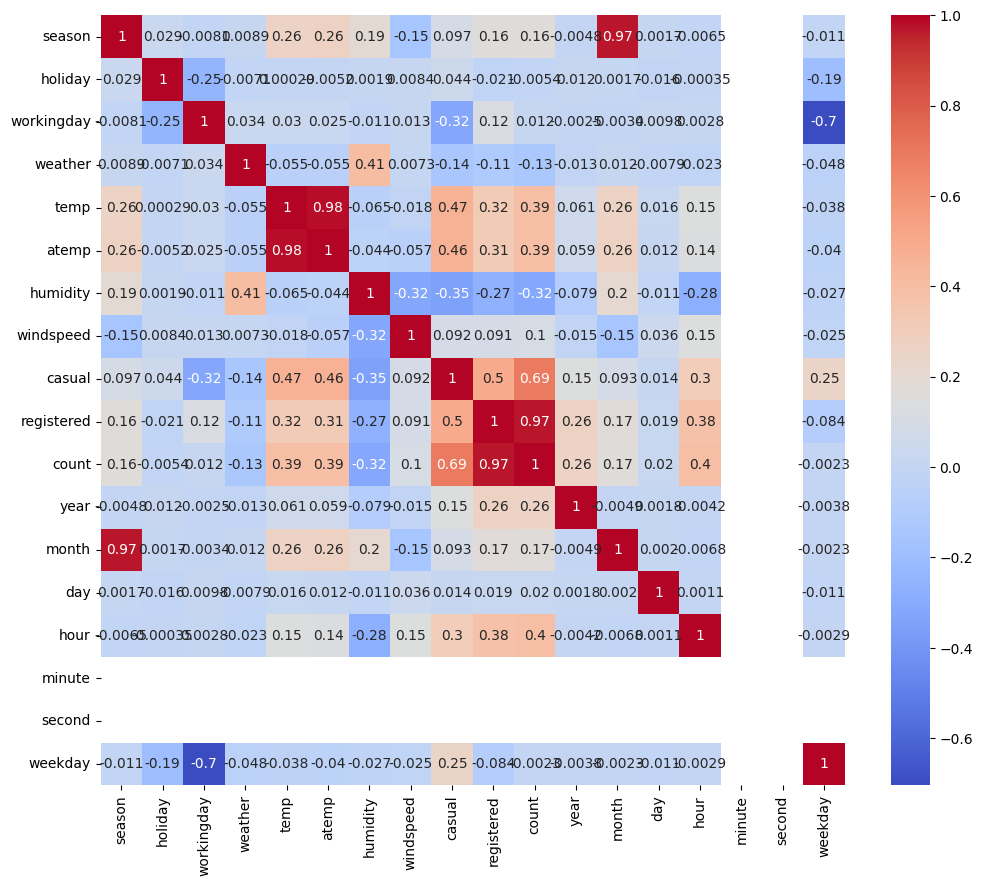

In [320]:
# 히트맵
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='count', ylabel='Density'>

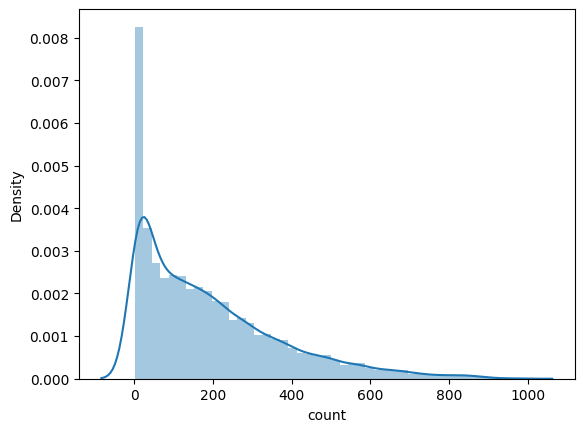

In [321]:
sns.distplot(train['count'])

In [322]:
X = train.drop('count', axis=1)
y = train['count']

In [323]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
rf.fit(X, y)


RandomForestRegressor()

In [324]:
# 로그변환


In [325]:
test.isna().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
year,0
month,0


<Axes: >

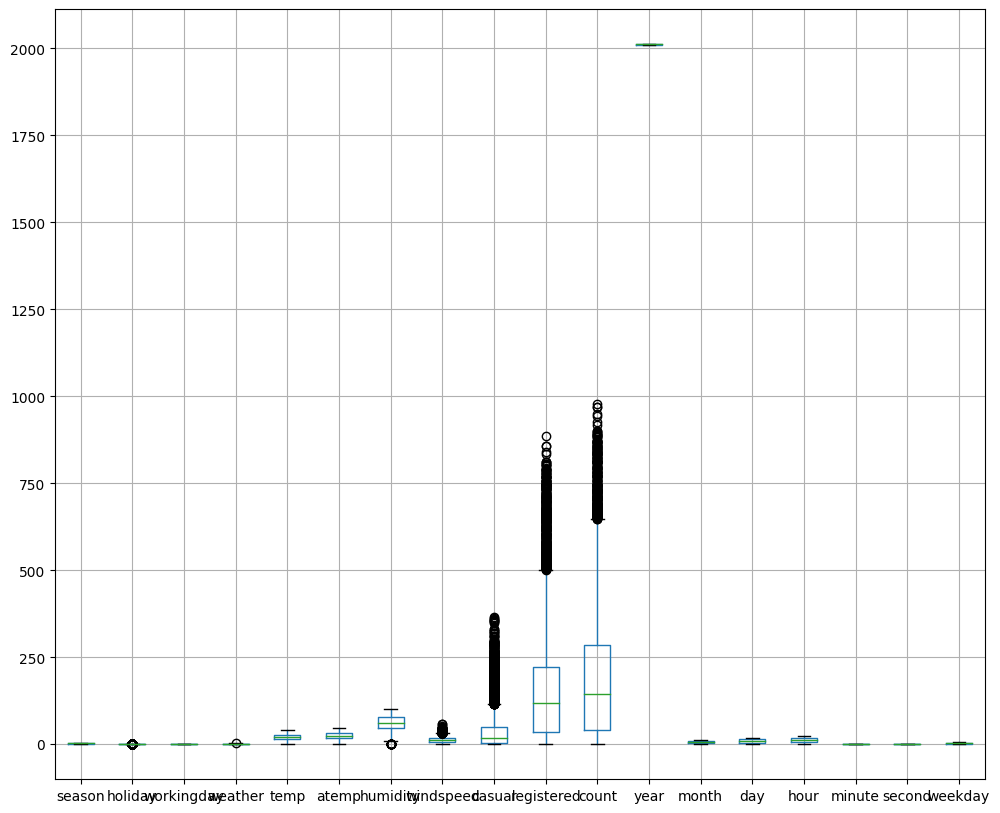

In [326]:
train.boxplot(figsize=(12,10))

In [327]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


- IQR = Q3 - Q1
- Q1 + 1.5 * IQR
- Q3 + 1.5 * IQR

In [328]:
# train 파일을 'train_new.csv' 파일로 저장
train.to_csv('train_new.csv', index=False)

In [336]:
test.to_csv('test_new.csv', index=False)

In [329]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  day         10886 non-null  int32  
 14  hour        10886 non-null  int32  
 15  minute      10886 non-null  int32  
 16  second      10886 non-null  int32  
 17  weekday     10886 non-null  int32  
dtypes: float64(3), int32(7), int64(8)
memory usage: 1.2 MB


In [330]:
train.quantile()

,0.5
season,3.000
holiday,0.000
workingday,1.000
weather,1.000
temp,20.500
atemp,24.240
humidity,62.000
windspeed,12.998
casual,17.000
registered,118.000


In [331]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
outlier = (train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))
outlier.sum()

,0
season,0
holiday,311
workingday,0
weather,1
temp,0
atemp,0
humidity,22
windspeed,227
casual,749
registered,423


In [332]:
train['count'].value_counts()

,count
count,
5,169
4,149
3,144
6,135
2,132
...,...
894,1
783,1
683,1


In [333]:
# columns_with_outliers = train.columns[outlier.any()]
# outlier_columns = train[columns_with_outliers]

In [335]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday
0,0,0,0,0,9.84,14.395,81,0.0,3,13,16,1,0,5
1,0,0,0,0,9.02,13.635,80,0.0,8,32,40,1,1,5
2,0,0,0,0,9.02,13.635,80,0.0,5,27,32,1,2,5
3,0,0,0,0,9.84,14.395,75,0.0,3,10,13,1,3,5
4,0,0,0,0,9.84,14.395,75,0.0,0,1,1,1,4,5


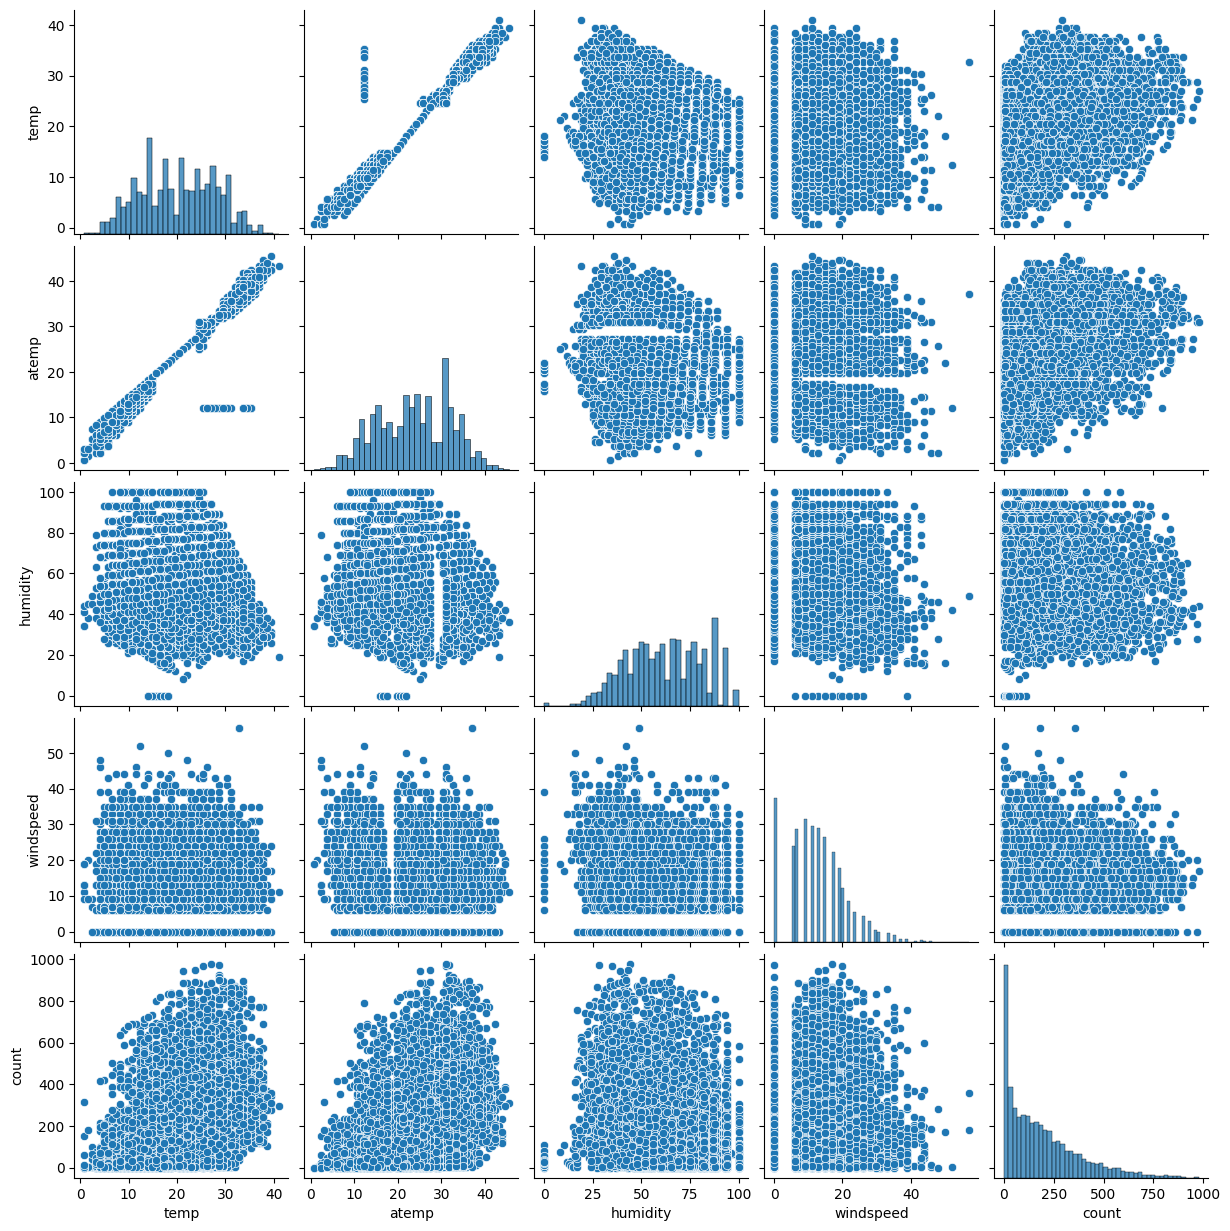

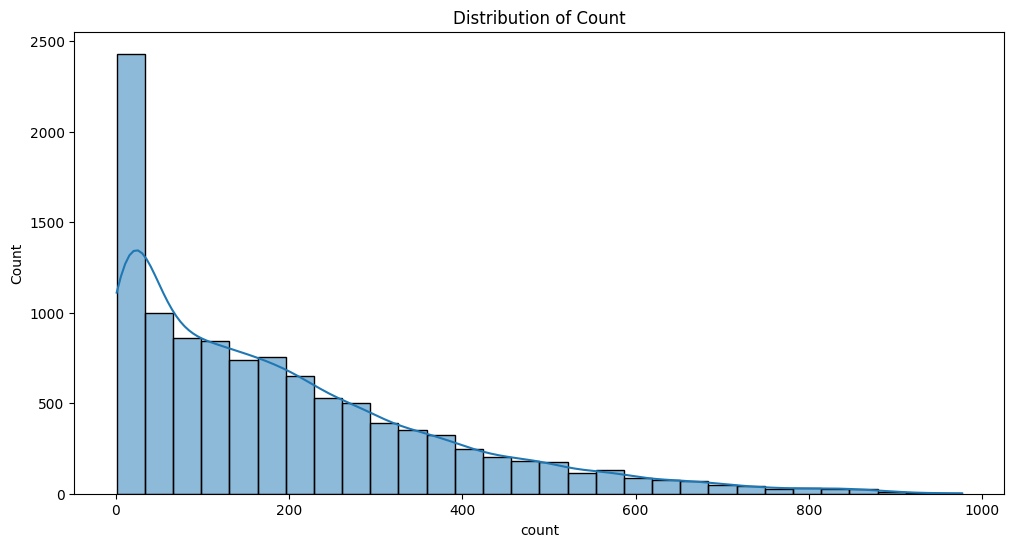

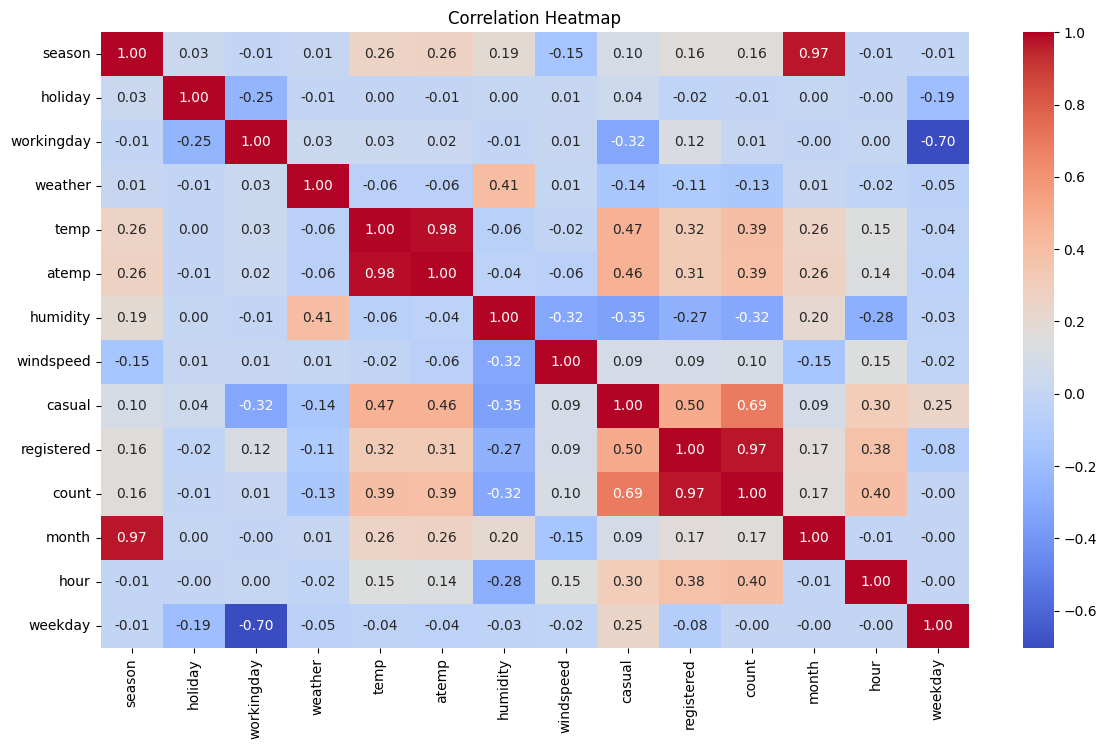

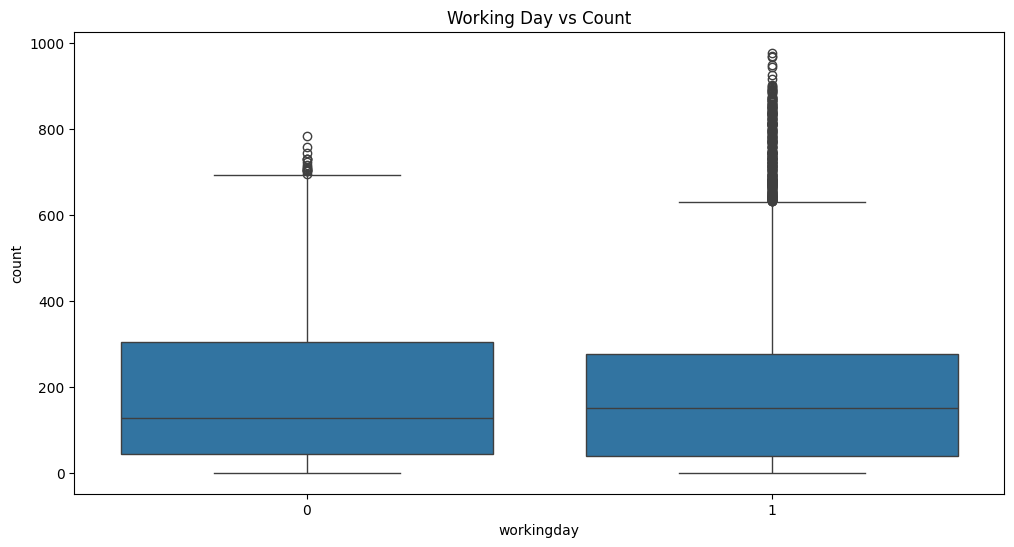

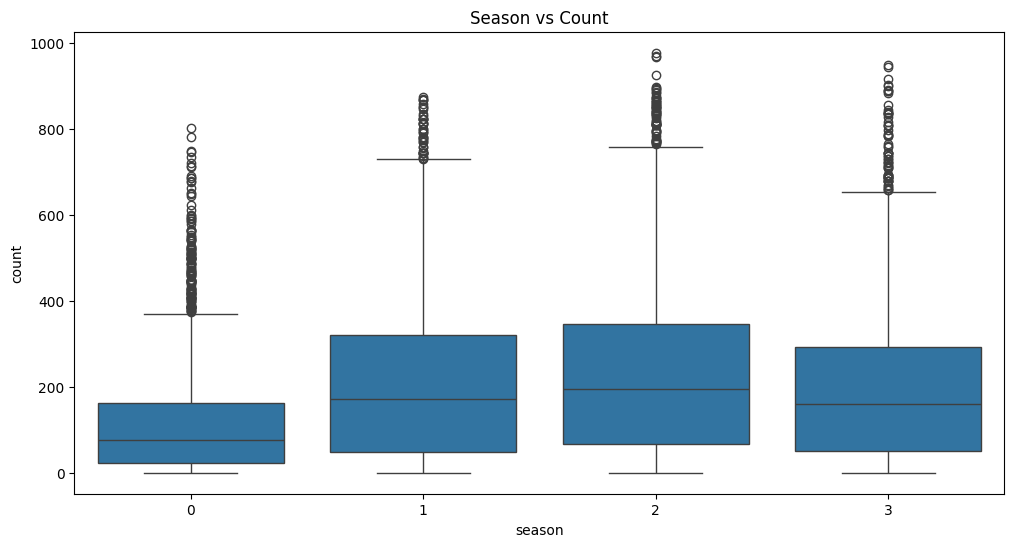

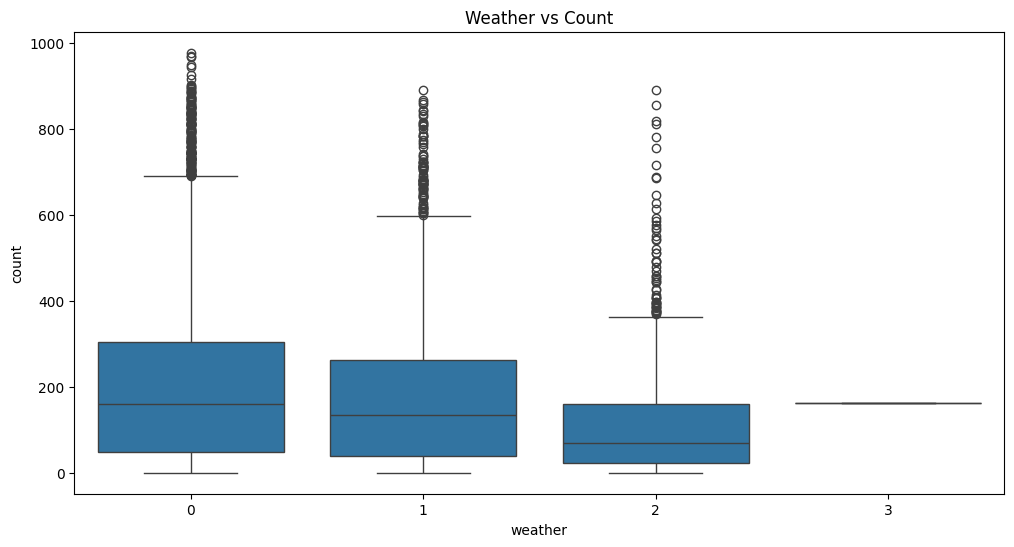

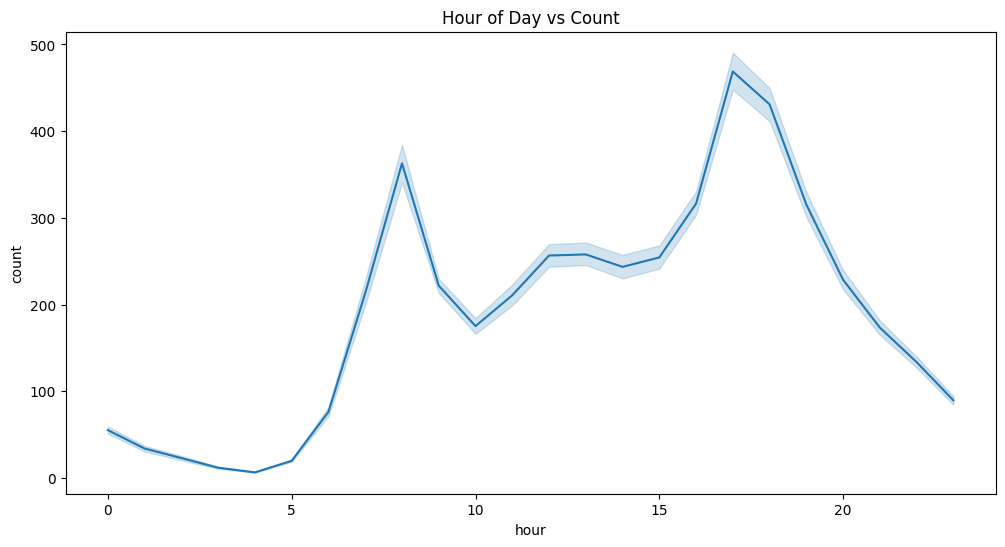

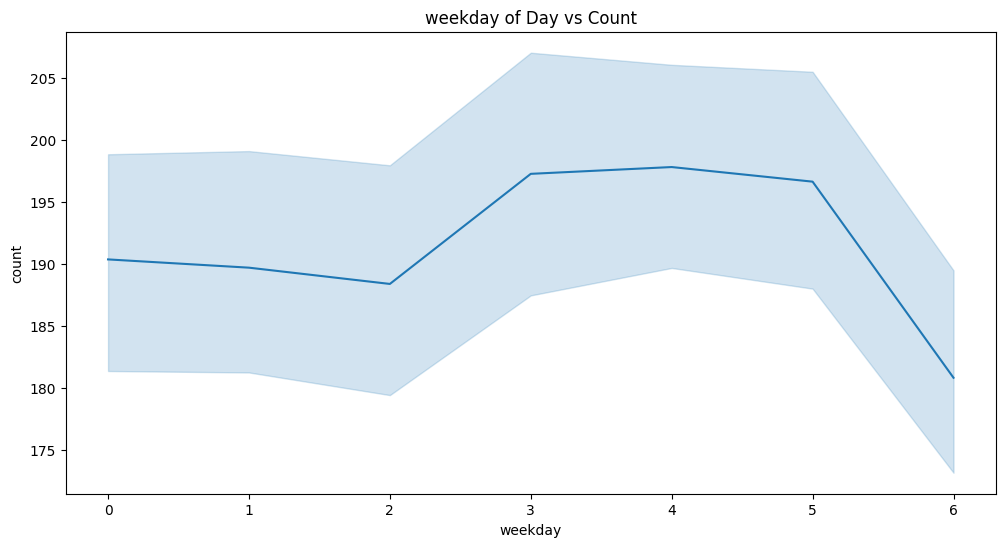

In [334]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


train = train.drop(['minute', 'second','year','day'], axis=1)
test = test.drop(['minute', 'second','year','day'], axis=1)

# 2. 범주형 변수 인코딩 (Label Encoding)
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'weekday']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

for col in categorical_features:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le


# 3. 데이터 시각화 및 탐색적 데이터 분석 (EDA)
# Pairplot (상관관계를 쉽게 확인할 수 있는 시각화)
sns.pairplot(train[['temp', 'atemp', 'humidity', 'windspeed', 'count']])
plt.show()

# Count Distribution
plt.figure(figsize=(12, 6))
sns.histplot(train['count'], bins=30, kde=True)
plt.title('Distribution of Count')
plt.show()

# 피처들 간의 상관계수 히트맵
plt.figure(figsize=(14, 8))
corr = train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 요일과 대여 수량 간의 관계
plt.figure(figsize=(12, 6))
sns.boxplot(x='workingday', y='count', data=train)
plt.title('Working Day vs Count')
plt.show()

# 계절과 대여 수량 간의 관계
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='count', data=train)
plt.title('Season vs Count')
plt.show()

# 날씨와 대여 수량 간의 관계
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='count', data=train)
plt.title('Weather vs Count')
plt.show()

# 시간대별 대여 수량 분포
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=train)
plt.title('Hour of Day vs Count')
plt.show()

# 요일별 대여 수량 분포
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekday', y='count', data=train)
plt.title('weekday of Day vs Count')
plt.show()

In [337]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [357]:
features = test.columns
train = train[features]

In [358]:
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=42)

In [359]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    'Ridge': {
        'model': Ridge(),
        'params' : {'alpha' : [0.01, 0.1, 1, 10, 100]}
    },
    'Lasso': {
        'model': Lasso(),
        'params' : {'alpha' : [0.01, 0.1, 1, 10, 100]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params' : {'n_estimators' : [100, 200, 300, 400, 500]}
    }
}


In [360]:
from sklearn.model_selection import GridSearchCV
import pickle

# X_train과 y_train은 이미 전처리된 학습 데이터입니다. 데이터가 준비된 상태라고 가정합니다.

# 최적 모델을 저장할 변수 초기화
best_model = None
best_score = float('-inf')
best_params = None
best_model_name = None

# 각 모델에 대해 그리드 서치를 수행
for model_name, model_info in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    clf.fit(X_train, y_train)

    # 그리드 서치 결과 출력
    print(f"Best score for {model_name}: {clf.best_score_}")
    print(f"Best parameters for {model_name}: {clf.best_params_}")

    # 최적의 모델을 저장
    if clf.best_score_ > best_score:
        best_score = clf.best_score_
        best_model = clf.best_estimator_
        best_params = clf.best_params_
        best_model_name = model_name

# 최적의 모델을 파일로 저장
if best_model is not None:
    model_filename = f"best_model_{best_model_name}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Best model ({best_model_name}) saved as {model_filename}")
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_params}")



Performing GridSearchCV for Ridge...
Best score for Ridge: -21815.338783529784
Best parameters for Ridge: {'alpha': 100}
Performing GridSearchCV for Lasso...
Best score for Lasso: -21803.070988009436
Best parameters for Lasso: {'alpha': 1}
Performing GridSearchCV for RandomForest...
Best score for RandomForest: -4511.373562290866
Best parameters for RandomForest: {'n_estimators': 400}
Best model (RandomForest) saved as best_model_RandomForest.pkl
Best Score: -4511.373562290866
Best Parameters: {'n_estimators': 400}


In [361]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 검증 데이터 (X_val, y_val) 준비
# X_val과 y_val은 검증용 데이터셋입니다. 데이터가 준비된 상태라고 가정합니다.

# 최적 모델로 검증 데이터셋에 대한 예측 수행
y_pred = best_model.predict(X_val)

# 평가 지표 계산
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = mse ** 0.5

# 평가 결과 출력
print(f"Evaluation Results for the Best Model ({best_model_name}):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Evaluation Results for the Best Model (RandomForest):
Mean Squared Error (MSE): 4287.859056112642
Root Mean Squared Error (RMSE): 65.48174597636078
Mean Absolute Error (MAE): 43.85779985187372
R^2 Score: 0.8700921808178302


In [362]:
from re import sub
submission = pd.read_csv('/content/sampleSubmission.csv')

In [363]:
len(X_train.columns) , len(test.columns)

(11, 11)

In [364]:
y_pred = best_model.predict(test)
submission['count'] = y_pred
submission.to_csv('submission.csv', index=False)

추후에 로그 변환만 추가